# Exploratory analysis of the ATLAS RPV image data

In [1]:
from __future__ import print_function
from __future__ import division
from __future__ import absolute_import

In [2]:
# Convenient fudge for python path
import sys
sys.path.append('..')

In [3]:
# If necessary, update to point to your pyjet installation area
sys.path.append('/global/homes/s/sfarrell/.local/cori/3.6-anaconda-4.4/lib/python3.6/site-packages')

In [4]:
# System imports
import os

# External imports
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm

# Local imports
from atlasgan import reco

# Magics
%matplotlib notebook

## Utilities

In [5]:
def draw_image(x, vmin=None, vmax=None, xlabel='$\eta$', ylabel='$\phi$',
               draw_cbar=True, ax=None, figsize=(5,4), **kwargs):
    if ax is None:
        _, ax = plt.subplots(figsize=figsize)
    cax = ax.imshow(x.T, extent=[-2.5, 2.5, -3.15, 3.15],
                    norm=LogNorm(vmin, vmax), aspect='auto',
                    origin='lower', **kwargs)
    if draw_cbar:
        cbar = plt.gcf().colorbar(cax, ax=ax)
        cbar.set_label('Normalized Energy')
    if xlabel is not None:
        ax.set_xlabel(xlabel)
    if ylabel is not None:
        ax.set_ylabel(ylabel)

## Load the data

In [6]:
# Cori file path
input_file = '/global/cscratch1/sd/sfarrell/atlas_gan/data/RPV10_1400_850_01.npz'
#input_file = '/global/cscratch1/sd/sfarrell/atlas_gan/data/RPV10_1600_850_01.npz'

# Maeve file path
#input_file = '/data0/sfarrell/atlas_rpv_data/RPV10_1600_250_01.npz'

In [7]:
n_samples = 2**12

In [8]:
with np.load(input_file) as f:
    hist = f['hist'][:n_samples].copy()

In [9]:
hist.shape

(4096, 64, 64)

## Show some sample images

<IPython.core.display.Javascript object>


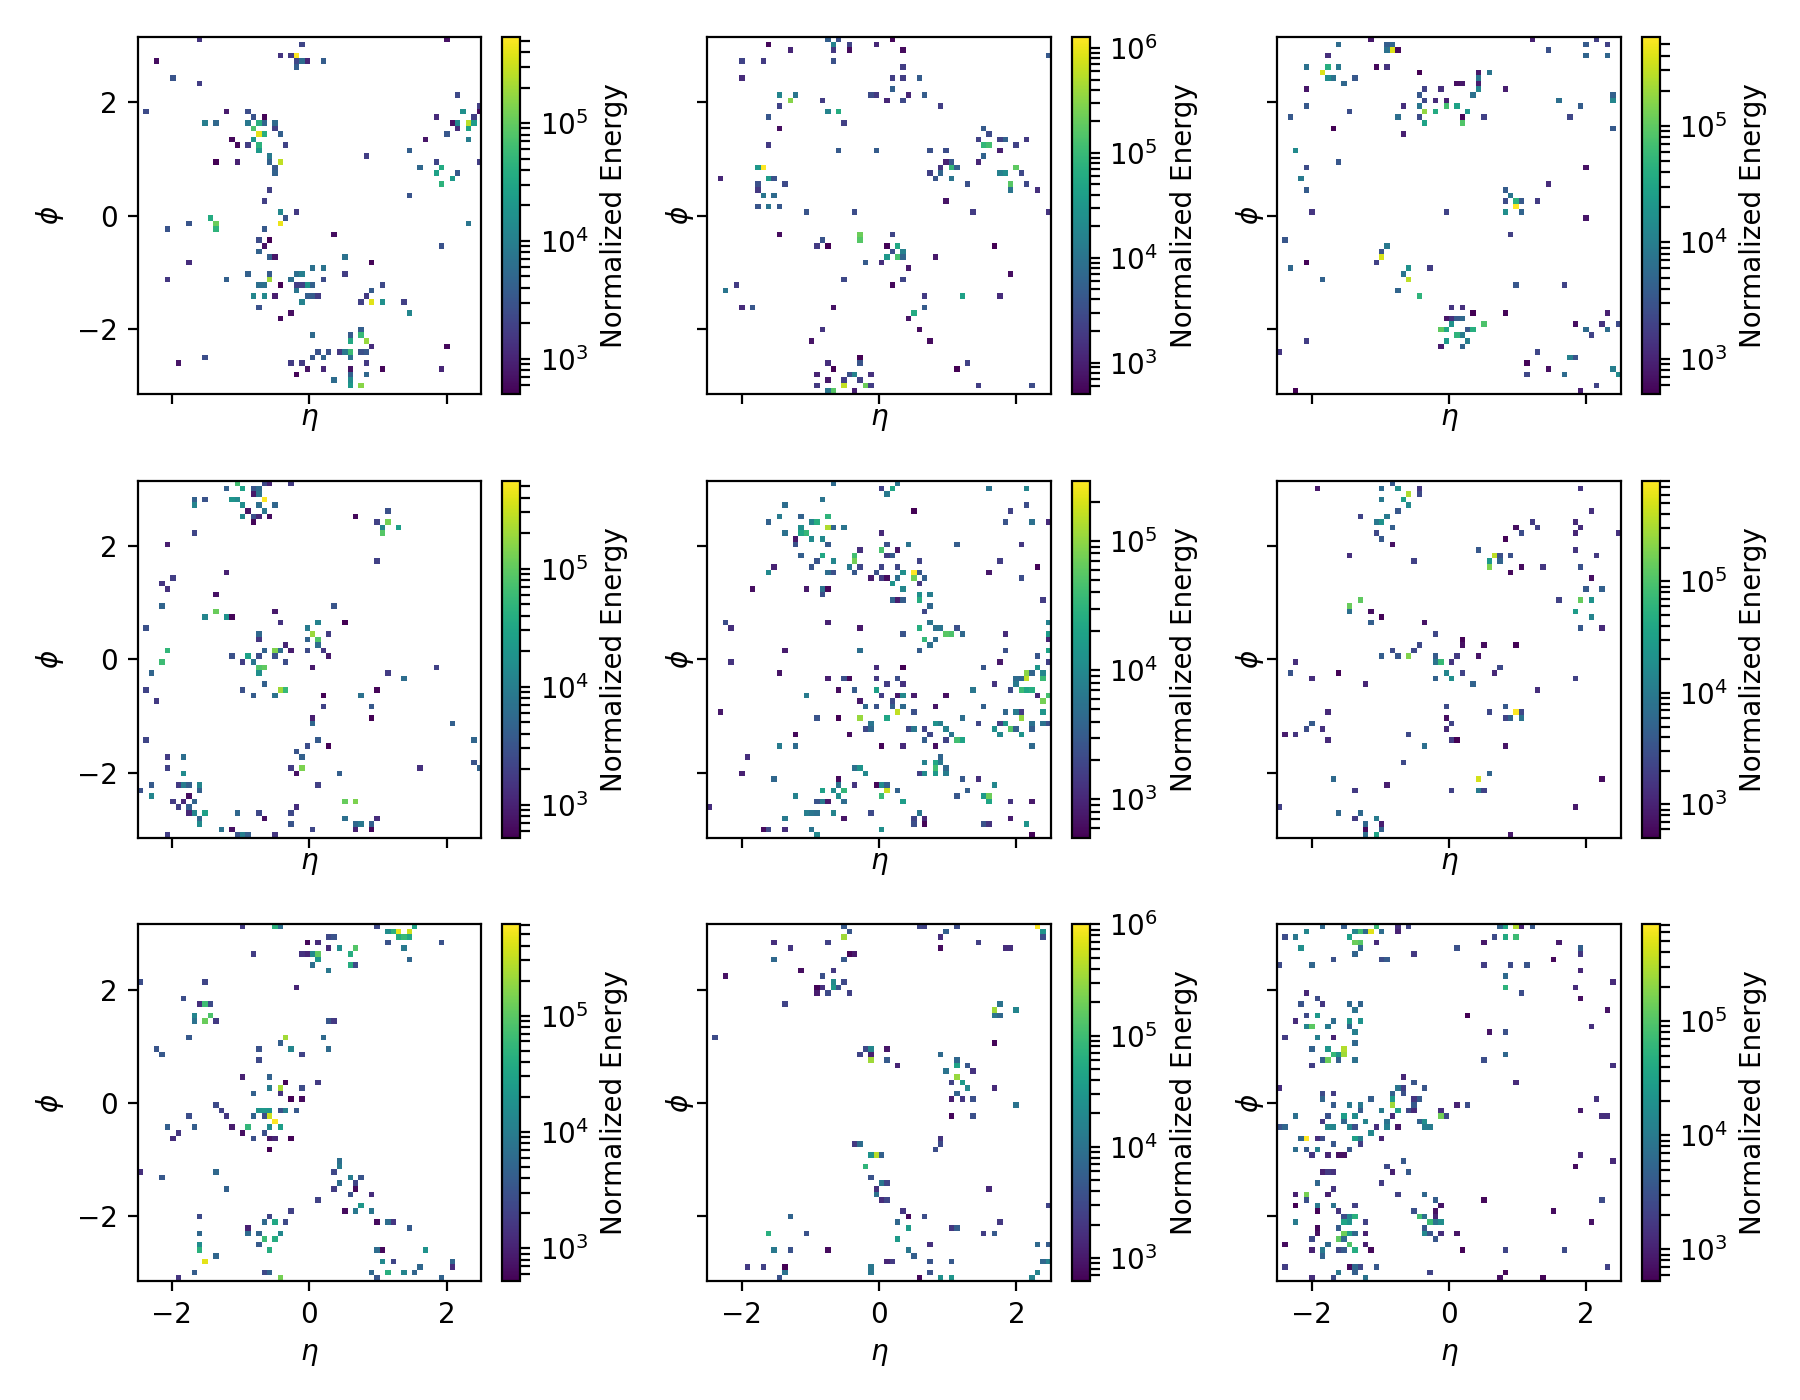

In [11]:
fig, axs = plt.subplots(3, 3, figsize=(9,7), sharex=True, sharey=True)
axs = axs.flatten()

for i, ax in enumerate(axs):
    draw_image(hist[i], ax=ax)

plt.tight_layout()

## Basic plots

### Pixel intensity (energy spectrum)

In [12]:
pixels = hist.flatten()
nonzero = (pixels > 0)

<IPython.core.display.Javascript object>


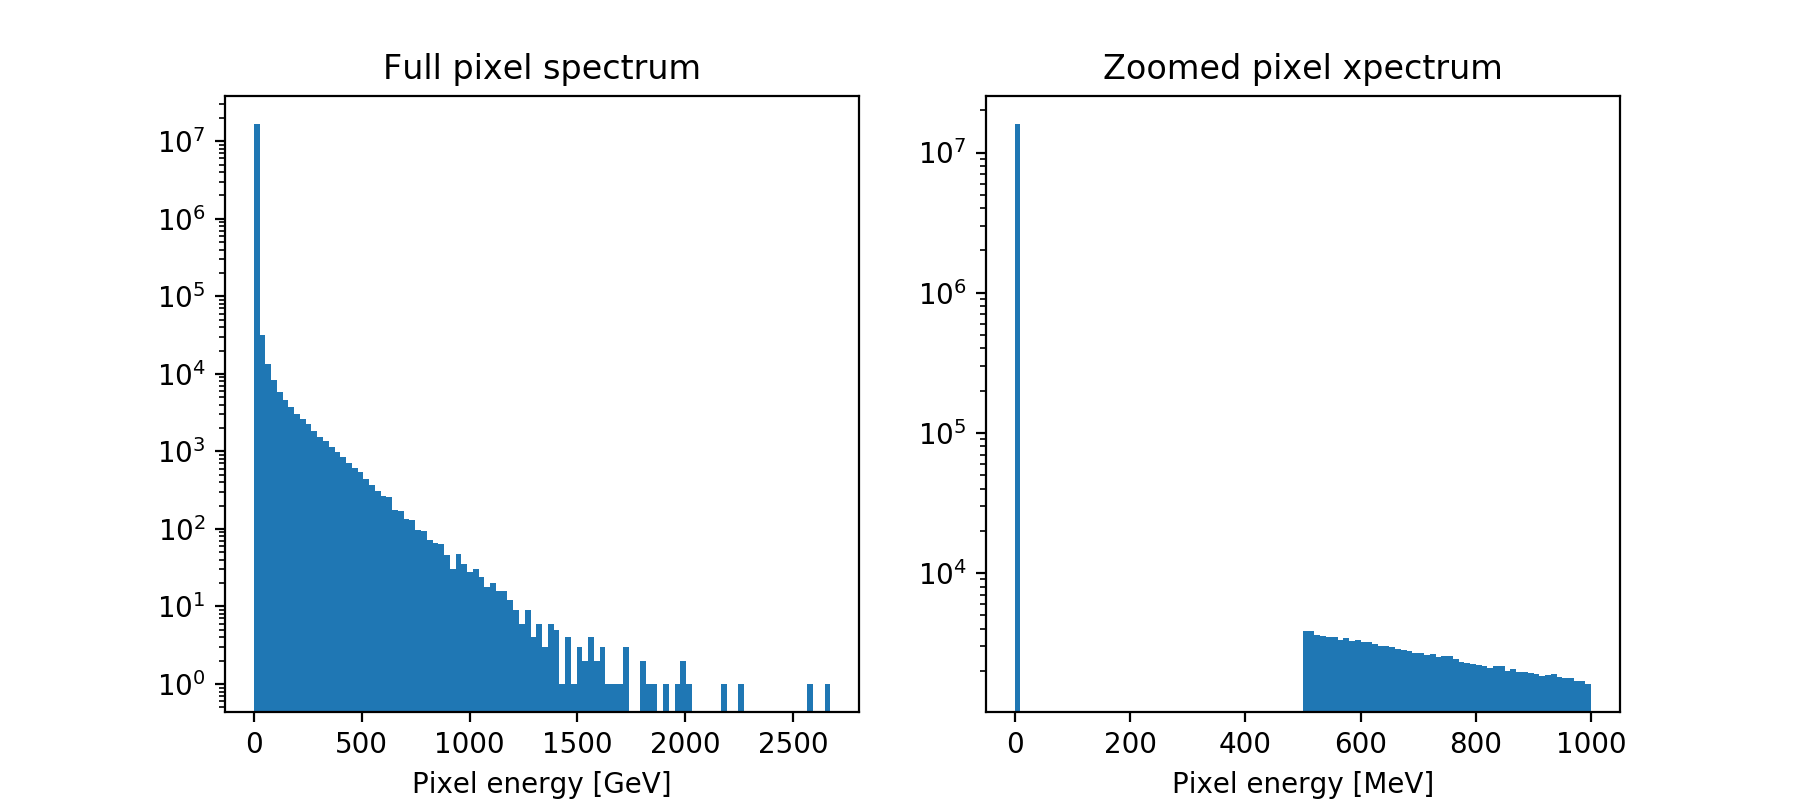

In [13]:
fig, (ax0, ax1) = plt.subplots(1, 2, figsize=(9,4))

ax0.hist(pixels/1e3, log=True, bins=100)
ax0.set_xlabel('Pixel energy [GeV]')
ax0.set_title('Full pixel spectrum')

ax1.hist(pixels, log=True, bins=100, range=(0, 1000))
ax1.set_xlabel('Pixel energy [MeV]')
ax1.set_title('Zoomed pixel xpectrum')

<IPython.core.display.Javascript object>


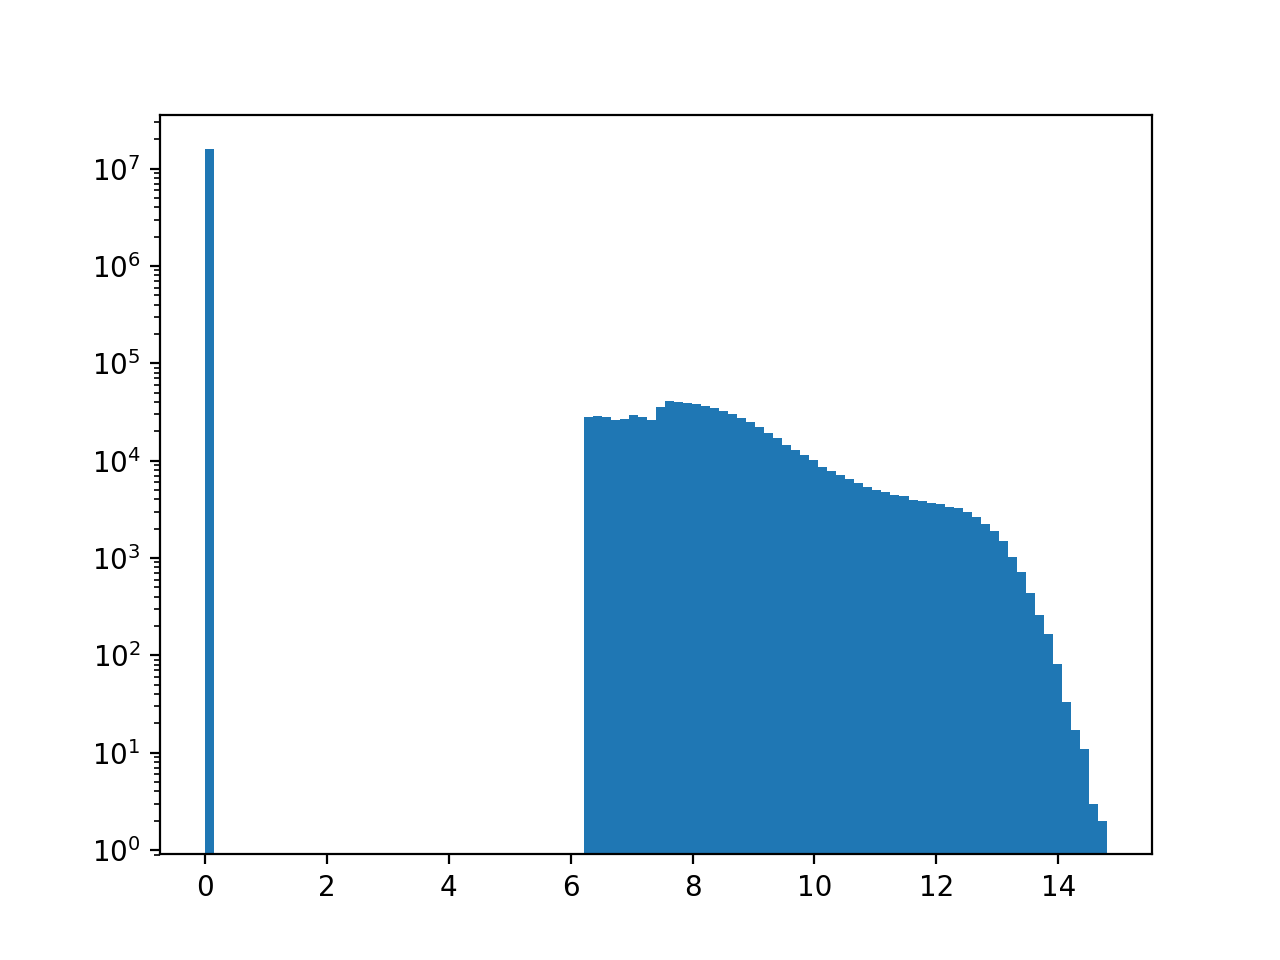

In [17]:
# Log pixel energy
plt.figure()
plt.hist(np.log(pixels + 1), log=True, bins=100);

## Apply reconstruction

In [19]:
jets = reco.reconstruct_events(hist)

## Physics plots

<IPython.core.display.Javascript object>


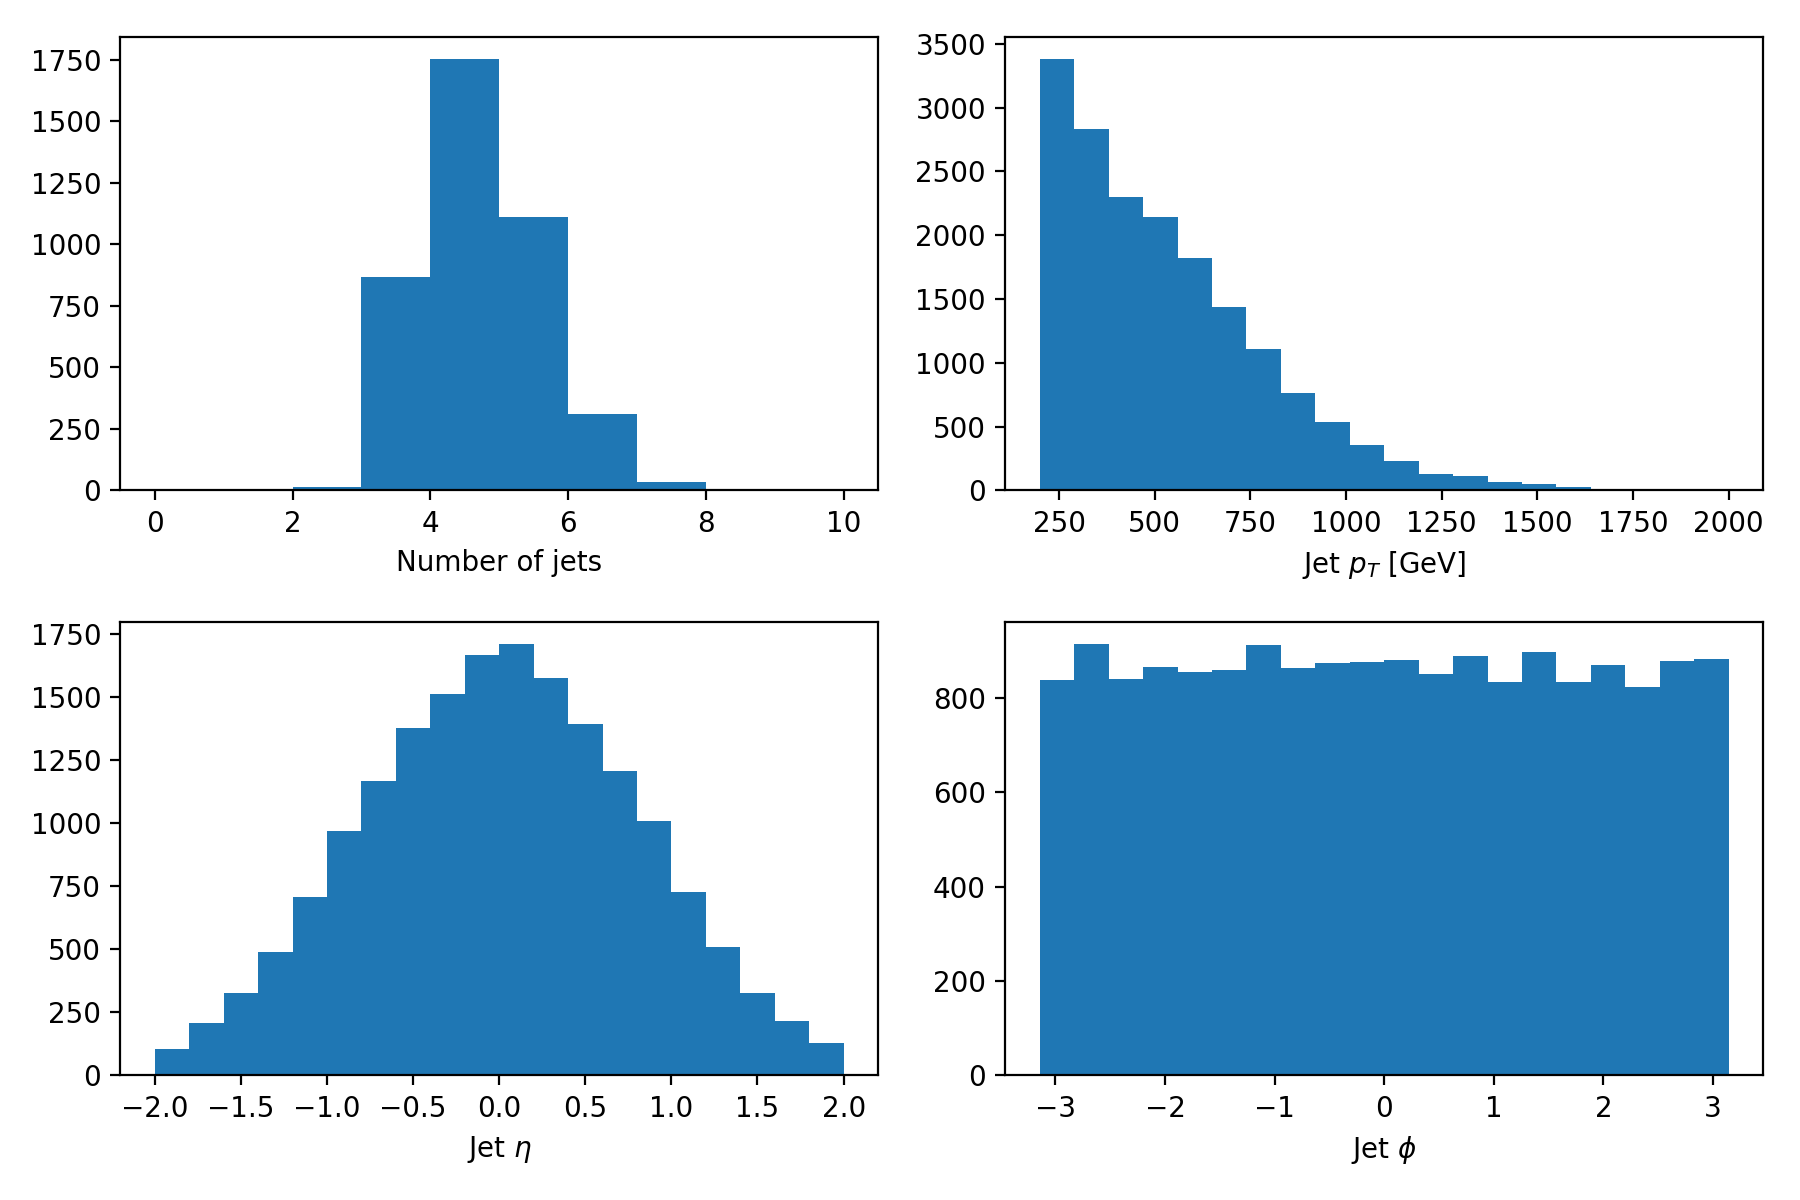

In [28]:
fig, ((ax0, ax1), (ax2, ax3)) = plt.subplots(2, 2, figsize=(9, 6))

# Jet multiplicity
nJet = jets.groupby('event').size()
ax0.hist(nJet, bins=10, range=(0,10))
ax0.set_xlabel('Number of jets')

# Jet PT
ax1.hist(jets.pt * 1e-3, bins=20, range=(200, 2000))
ax1.set_xlabel('Jet $p_T$ [GeV]')

# Jet eta
ax2.hist(jets.eta, bins=20, range=(-2, 2))
ax2.set_xlabel('Jet $\eta$')

# Jet phi
ax3.hist(jets.phi, bins=20, range=(-np.pi, np.pi))
ax3.set_xlabel('Jet $\phi$')

plt.tight_layout()

<IPython.core.display.Javascript object>


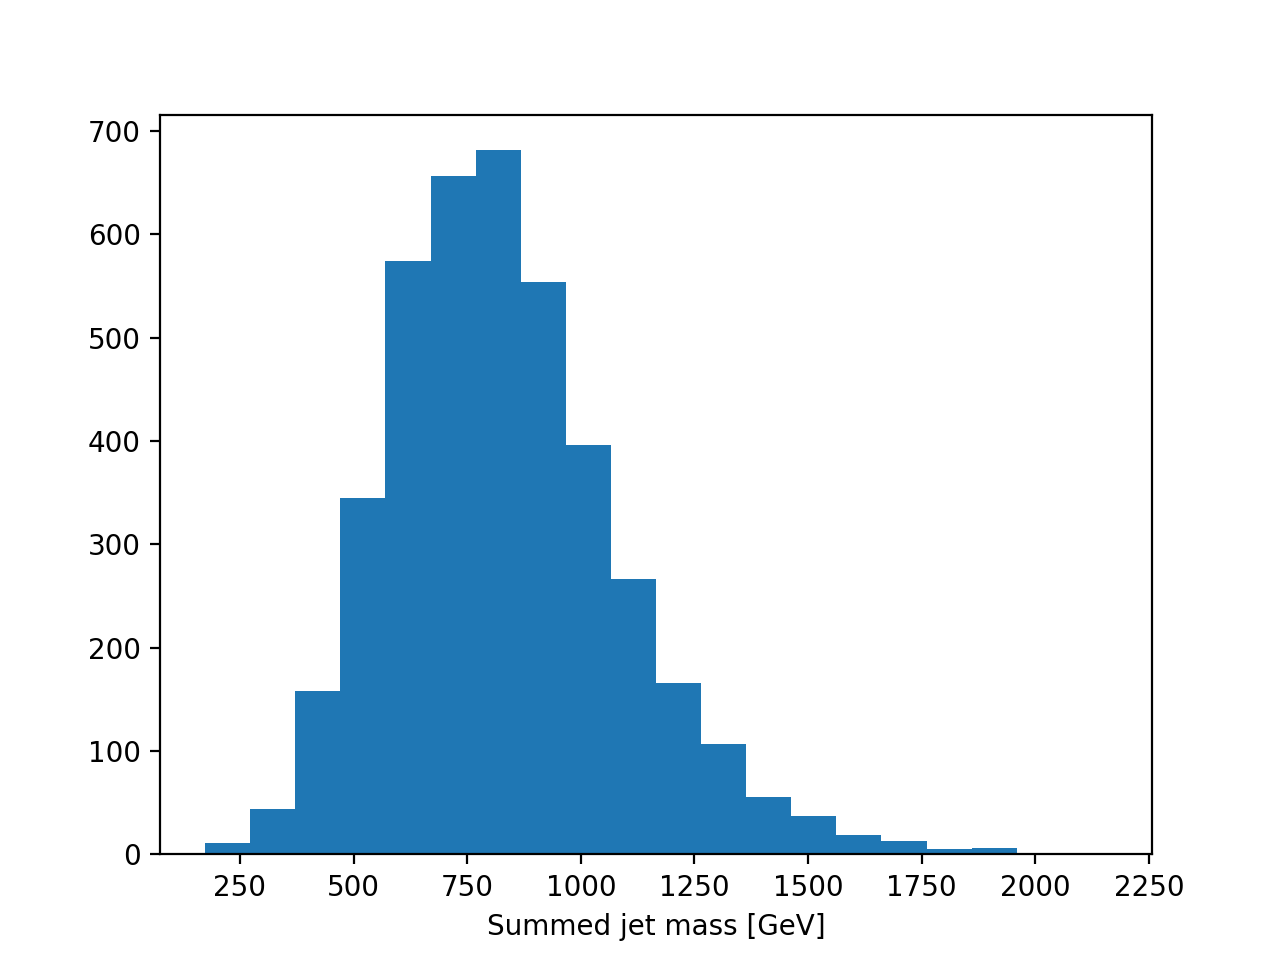

In [25]:
plt.figure()

# Sum of jet mass
sumMass = jets.groupby('event').apply(lambda x: x.m.sum())
plt.hist(sumMass*1e-3, bins=20)
plt.xlabel('Summed jet mass [GeV]');